D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
D:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Dehydrated')

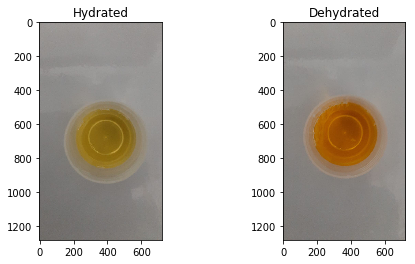

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np

#plt.figure(figsize=(10,10))
from scipy import misc

# Read Images 
img1 = misc.imread(r'images\hydrated urine\Urine3.jpeg')
img2 = misc.imread(r'images\Dehydrated urine\DUrine3.jpeg') 

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[0].set_title("Hydrated")

ax[1].imshow(img2, cmap=plt.cm.gray)
ax[1].set_title("Dehydrated")


# Output Images 

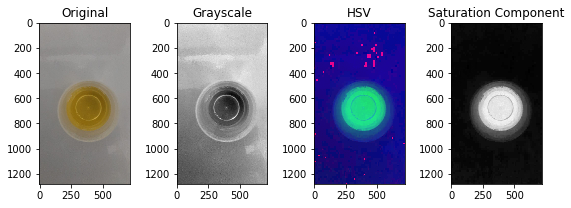

In [12]:
import skimage.color

grayscale = skimage.color.rgb2gray(img)
img_hsv = skimage.color.rgb2hsv(img)
saturation = img_hsv[:,:,1]
orig_phantom = img_as_ubyte(saturation)

fig, axes = plt.subplots(1, 4, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(img)
ax[0].set_title("Original")

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

ax[2].imshow(img_hsv,cmap ="hsv")
ax[2].set_title("HSV")

ax[3].imshow(orig_phantom,cmap =plt.cm.gray)
ax[3].set_title("Saturation Component")

fig.tight_layout()
plt.show()

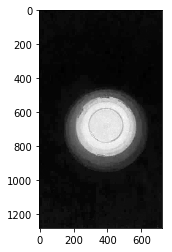

In [4]:
#plt.imshow(img_hsv[:,:,1])
saturation = img_hsv[:,:,1]
grayscale2 = skimage.color.rgb2gray(saturation)
plt.imshow(grayscale2,cmap ="gray")

In [11]:
saturation

array([[0.03333333, 0.03333333, 0.02684564, ..., 0.04895105, 0.04861111,
        0.04861111],
       [0.03311258, 0.03311258, 0.02666667, ..., 0.04794521, 0.04761905,
        0.04761905],
       [0.02614379, 0.02631579, 0.02631579, ..., 0.04666667, 0.04666667,
        0.04635762],
       ...,
       [0.0462963 , 0.0462963 , 0.04587156, ..., 0.05185185, 0.05072464,
        0.05      ],
       [0.04672897, 0.04672897, 0.0462963 , ..., 0.05223881, 0.05147059,
        0.05109489],
       [0.04716981, 0.04716981, 0.04672897, ..., 0.05223881, 0.05263158,
        0.05263158]])

In [12]:
grayscale2

array([[0.03333333, 0.03333333, 0.02684564, ..., 0.04895105, 0.04861111,
        0.04861111],
       [0.03311258, 0.03311258, 0.02666667, ..., 0.04794521, 0.04761905,
        0.04761905],
       [0.02614379, 0.02631579, 0.02631579, ..., 0.04666667, 0.04666667,
        0.04635762],
       ...,
       [0.0462963 , 0.0462963 , 0.04587156, ..., 0.05185185, 0.05072464,
        0.05      ],
       [0.04672897, 0.04672897, 0.0462963 , ..., 0.05223881, 0.05147059,
        0.05109489],
       [0.04716981, 0.04716981, 0.04672897, ..., 0.05223881, 0.05263158,
        0.05263158]])

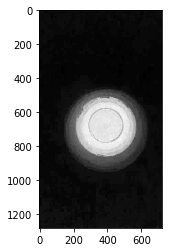

In [5]:
from skimage.util import img_as_ubyte
orig_phantom = img_as_ubyte(saturation)
fig, ax = plt.subplots()
ax.imshow(orig_phantom, cmap=plt.cm.gray)

In [14]:
orig_phantom

array([[ 9,  9,  7, ..., 12, 12, 12],
       [ 8,  8,  7, ..., 12, 12, 12],
       [ 7,  7,  7, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 13, 13, 13],
       [12, 12, 12, ..., 13, 13, 13],
       [12, 12, 12, ..., 13, 13, 13]], dtype=uint8)

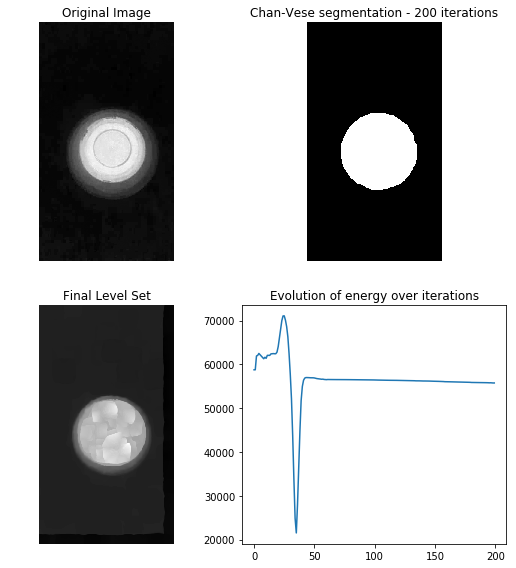

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

#image = img_as_float(data.camera())
image = orig_phantom
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()


In [19]:
cv[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


Text(0.5, 1.0, 'Morphological ACWE evolution')

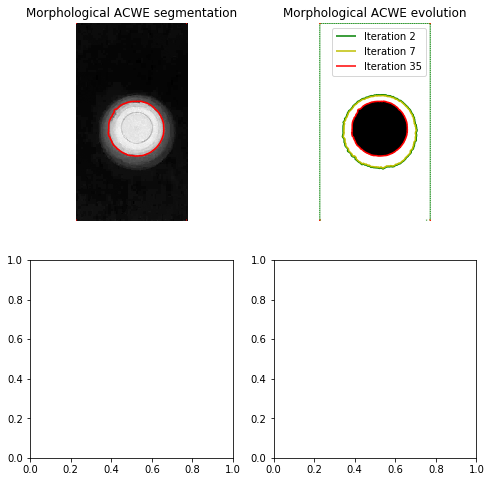

In [9]:

# Morphological ACWE
#image = img_as_float(data.camera())
image =orig_phantom

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=50,
                             iter_callback=callback)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[7], [0.5], colors='y')
contour.collections[0].set_label("Iteration 7")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 35")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

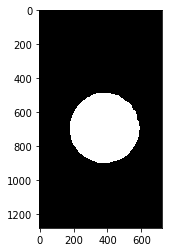

In [25]:
import scipy
bw = cv[0]
img_fill_holes = scipy.ndimage.morphology.binary_fill_holes(bw)
plt.imshow(img_fill_holes, cmap="gray")

In [14]:
x= img
x[:,:,0] =x[:,:,0]*bw
x[:,:,1] =x[:,:,1]*bw
x[:,:,2] =x[:,:,2]*bw

NameError: name 'bw' is not defined

In [29]:
x[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
#plt.imshow(x,cmap="RGB")
x.shape
plt.imshow(img)

NameError: name 'x' is not defined

In [24]:
x[:,:,1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
plt.imshow(x)

In [ ]:
import scipy
bw = evolution[-1]
plt.imshow(bw, cmap="gray")

In [ ]:
x= img
x[:,:,0] =x[:,:,0]*bw
x[:,:,1] =x[:,:,1]*bw
x[:,:,2] =x[:,:,2]*bw

In [ ]:
plt.imshow(x)

In [ ]:
plt.imshow(x)
print(x[:,:,0].mean().round(3))
print(x[:,:,1].mean().round(3))
print(x[:,:,2].mean().round(3))

In [ ]:
from skimage import color
ximg_hsv = color.rgb2hsv(x)

In [ ]:
plt.imshow(ximg_hsv[:,:,2],cmap="gray")
print(ximg_hsv[:,:,0].mean().round(3))
print(ximg_hsv[:,:,1].mean().round(3))
print(ximg_hsv[:,:,2].mean().round(3))

In [ ]:
img_xyz = color.rgb2xyz(img)
print(img_xyz[:,:,0].mean().round(3))
print(img_xyz[:,:,1].mean().round(3))
print(img_xyz[:,:,2].mean().round(3))

In [ ]:
img_rgbcie = color.rgb2rgbcie(img)
print(img_rgbcie[:,:,0].mean().round(3))
print(img_rgbcie[:,:,1].mean().round(3))
print(img_rgbcie[:,:,2].mean().round(3))

In [ ]:
img_gray = rgb2gray(img)
print(img_gray.mean().round(3))

In [ ]:
img_lab = color.rgb2lab(img)
print(img_lab[:,:,0].mean().round(3))
print(img_lab[:,:,1].mean().round(3))
print(img_lab[:,:,2].mean().round(3))

In [ ]:
img_yuv = color.rgb2yuv(img)
print(img_yuv[:,:,0].mean().round(3),img_yuv[:,:,1].mean().round(3),img_yuv[:,:,2].mean().round(3))

In [ ]:
img_yuv = color.rgb2yuv(img)
print(img_yuv[:,:,0].mean().round(3),img_yuv[:,:,1].mean().round(3),img_yuv[:,:,2].mean().round(3))